# **Data Exploration**

Import các thư viện cần thiết.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Đọc dữ liệu từ file csv.

In [2]:
# read file csv
df = pd.read_csv('./data/data.csv')
df.head()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


## 1. DỮ LIỆU CÓ BAO NHIÊU DÒNG, BAO NHIÊU CỘT?

In [3]:
print(f"Kích thước dữ liệu : {df.shape}")

Kích thước dữ liệu : (2832, 14)


## 2. KHÁM PHÁ CÁC DÒNG DỮ LIỆU

### 2.1 Mỗi dòng có ý nghĩa gì? Có dòng nào có ý nghĩa khác với các dòng còn lại hay không? 

- Mỗi dòng là thông tin về người khảo sát như và thói quen đọc sách của một người trong vòng 12 tháng vừa qua.

- Không có dòng nào có ỹ nghĩa khác so với các dòng còn lại.

### 2.2 Có dòng nào bị trùng không? 

In [4]:
# count duplicate rows
dublicate_rows = df.duplicated().sum()
print(f"Số dòng bị trùng: {dublicate_rows}")

Số dòng bị trùng: 1


- Kết quả cho thấy rằng có 1 dòng bị trùng. Nhóm tiến hành xóa bỏ dòng bị trùng đó.

In [ ]:
# remove the dublicate row
df = df.drop_duplicates()
print(f"Kích thước dữ liệu: {df.shape}")

Kích thước dữ liệu: (2831, 14)


## 3. KHÁM PHÁ CÁC CỘT DỮ LIỆU

### 3.1 Dữ liệu có những cột nào ? 

In [6]:
df.columns

Index(['Age', 'Sex', 'Race', 'Marital status?', 'Education', 'Employement',
       'Incomes', 'How many books did you read during last 12months?',
       'Read any printed books during last 12months?',
       'Read any audiobooks during last 12months?',
       'Read any e-books during last 12months?', 'Last book you read, you…',
       'Do you happen to read any daily news or newspapers?',
       'Do you happen to read any magazines or journals?'],
      dtype='object')

- Như mô tả về ý nghĩa các dòng dữ liệu ở trên, dữ liệu chứa các câu hỏi khảo sát về thói quen đọc sách trong vòng 12 tháng qua nên cụm từ "last 12 months" xuất hiện khá nhiều. Điều này làm cho các cột có ý nghĩa rõ ràng hơn nhưng đồng thời khiến tên cột trở nên dài 1 cách không cần thiết và gây khó cho việc trực quan.

- Vì vậy, nhóm quyết định đổi tên cột dữ liệu cho ngắn hơn như dưới đây để tiện cho quá trình làm việc nhưng không làm mất đi ý nghĩa các cột.

In [7]:
df.rename(columns={'Marital status?': 'Marital status'}, inplace=True)
df.rename(columns={'Last book you read, you…': 'Source of the last book read'}, inplace=True)
df.rename(columns={'How many books did you read during last 12months?': 'Number of books read'}, inplace= True)
df.rename(columns={'Read any printed books during last 12months?':'Printed books?'}, inplace=True)
df.rename(columns={'Read any audiobooks during last 12months?': 'Audiobooks?'}, inplace=True)
df.rename(columns={'Read any e-books during last 12months?':'E-books?'}, inplace=True)
df.rename(columns={'Do you happen to read any daily news or newspapers?':'Daily news/newspapers reader?'}, inplace=True)
df.rename(columns={'Do you happen to read any magazines or journals?':'Magazines/Journals Reader?'}, inplace=True)

### 3.2 Ý nghĩa các cột dữ liệu

Mỗi cột dữ liệu có ý nghĩa như trong bảng dưới đây.

|**TÊN CỘT**|**Ý NGHĨA**|
|-----------|-------|
| Age| Tuổi của người tham gia khảo sát|
| Sex| gender of the respondent|
| Race| the racial or ethnic background of the respondent|
| Marital status| the current marital status of the respondent|
| Education| the highest level of education completed by the respondent|
| Employement| the employment status of the respondent|
| Income| the income level of the respondent|
| Number of books read| the total number of books the respondent has read in the past year|
| Printed books?| a yes/no question indicating whether the respondent has read any printed books (physical books) in the past year|
| Audiobooks?| a yes/no question indicating whether the respondent has read any audiobooks in the past year|
| E-books?| a yes/no question indicating whether the respondent has read any electronic books in the past year|
| Source of the last book read| the method the respondent used to get the book he/she most recently read|
| Daily news/newspapers reader?| a yes/no question indicating whether the respondent reads daily news sources or newspapers|
| Magazines/Journals Reader?| a yes/no question indicating whether the respondent reads magazines or academic journals|


### 3.3 Kiểu dữ liệu hiện tại của các cột là gì? Có cột nào có kiểu dữ liệu không phù hợp hay không?

- Kiểu dữ liệu hiện tại của các cột:

In [8]:
column_types = df.dtypes
column_types

Age                               int64
Sex                              object
Race                             object
Marital status                   object
Education                        object
Employement                      object
Incomes                          object
Number of books read              int64
Printed books?                   object
Audiobooks?                      object
E-books?                         object
Source of the last book read     object
Daily news/newspapers reader?    object
Magazines/Journals Reader?       object
dtype: object

- Kiểm tra kiểu dữ liệu hiện tại có phù hợp hay không:

- The 'income' column is considered numeric data type, but since the survey does not ask for a specific income level but only a range, it has a string data type. We convert it into tuple for easier statistics.

In [9]:
#initialize a dictionary to convert string to tuple
income_mapping = {
    'Less than $10,000': 1,
    '$10,000 to under $20,000': 2,
    '$20,000 to under $30,000': 3,
    '$30,000 to under $40,000': 4,
    '$40,000 to under $50,000': 5,
    '$50,000 to under $75,000': 6,
    '$75,000 to under $100,000': 7,
    '9$100,000 to under $150,000': 8,
    '$100,000 to under $150,000': 8, 
}

In [10]:
df.replace({'Incomes': income_mapping}, inplace=True)
df.drop(df[df['Incomes'] == 'Refused'].index, inplace=True)

- Kiểu dữ liệu sau khi điều chỉnh:

In [11]:
column_types = df.dtypes
column_types

Age                               int64
Sex                              object
Race                             object
Marital status                   object
Education                        object
Employement                      object
Incomes                          object
Number of books read              int64
Printed books?                   object
Audiobooks?                      object
E-books?                         object
Source of the last book read     object
Daily news/newspapers reader?    object
Magazines/Journals Reader?       object
dtype: object

## 4. THỐNG KÊ CHO CÁC CỘT KIỂU NUMERICAL

### 4.1 Các cột kiểu numerical trong dữ liệu

In [12]:
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
numerical_columns

['Age', 'Number of books read']

### 4.2 Tính chất của các cột

|**Tên cột**|**Phân phối**|
|-----------|-------------|
|Age| Liên tục|
|Number of books read| Rời rạc|

### 4.3 Tỉ lệ dữ liệu bị thiếu

In [13]:
for col_name in numerical_columns:
    print(f'{col_name}: {df[col_name].isnull().mean()*100}%')

Age: 0.0%
Number of books read: 0.0%


### 4.4 Tính toán giá trị thống kê. Dữ liệu có bất thường không? 

In [14]:
df.describe()

,Age,Number of books read
count,2540.000000,2540.000000
mean,46.061811,16.732677
std,18.335151,23.710754
min,16.000000,0.000000
25%,31.000000,3.000000
50%,47.000000,7.000000
75%,60.000000,20.000000
max,93.000000,97.000000


### 4.5 Trực quan hóa phân phối dữ liệu

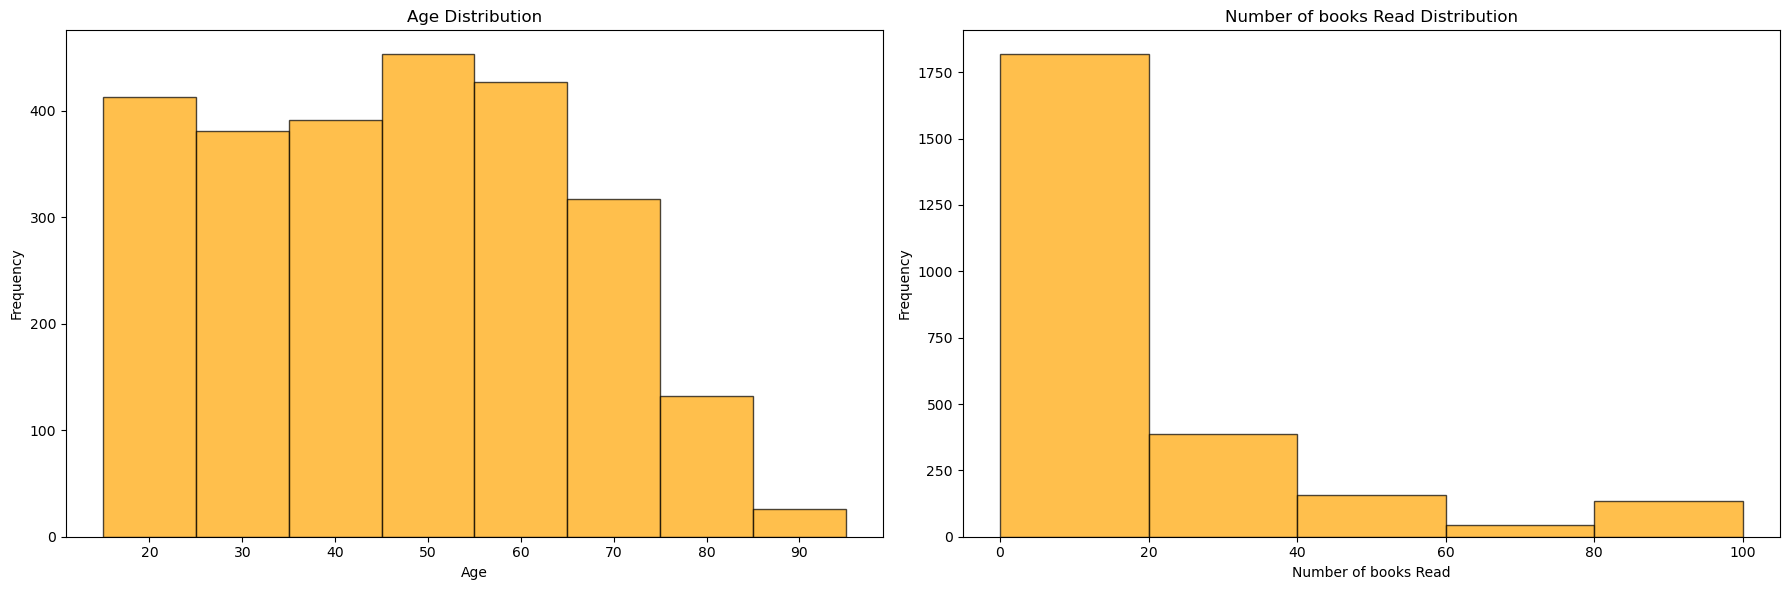

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# 1. histogram of 'age'
age_bins = [15, 25, 35, 45, 55, 65, 75, 85, 95]
axes[0].hist(df['Age'], bins=age_bins, color='orange', edgecolor='black', alpha=0.7)
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# 2. histogram of 'number_of_books_read'
book_bin_edges = list(range(0, 101, 20))
axes[1].hist(df['Number of books read'], bins=book_bin_edges, color='orange', edgecolor='black', alpha=0.7)
axes[1].set_title('Number of books Read Distribution')
axes[1].set_xlabel('Number of books Read')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5. THỐNG KÊ CHO CÁC CỘT KIỂU PHÂN LOẠI

### 5.1 Các cột kiểu categorical

In [16]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['Sex',
 'Race',
 'Marital status',
 'Education',
 'Employement',
 'Incomes',
 'Printed books?',
 'Audiobooks?',
 'E-books?',
 'Source of the last book read',
 'Daily news/newspapers reader?',
 'Magazines/Journals Reader?']

### 5.2 Tính chất của các cột

|**Tên cột**|**Tính chất**|
|-----------|-------------|
|Sex| Không có thứ tự|
|Race| Không có thứ tự|
|Marital status| Không có thứ tự|
|Education| Không có thứ tự|
|Employment| Không có thứ tự|
|Incomes| Có thứ tự|
|Printed books?| Không có thứ tự|
|Audiobooks?| Không có thứ tự|
|E-books?| Không có thứ tự|
|Source of the last book read| Không có thứ tự|
|Daily news/newspapers reader?| Không có thứ tự|
|Magazines/Journals Reader?| Không có thứ tự|

### 5.3 Các giá trị của từng cột

In [17]:
def flatten_categorical_stats(df, categorical_columns):
    rows = []
    
    for col in categorical_columns:
        total = len(df[col])
        counts = df[col].value_counts(dropna=False)
        percentages = (counts / total * 100).round(2)
        
        # tạo các hàng cho từng giá trị của từng cột
        for value, count, percentage in zip(counts.index, counts.values, percentages.values):
            row = {
                'column': col,
                'value': value,
                'count': count,
                'percentage': percentage
            }
            rows.append(row)
    
    result_df = pd.DataFrame(rows)
    return result_df


In [18]:
pd.set_option('display.max_colwidth', 100) 
pd.set_option('display.max_columns', None) 

cat_dis_df = flatten_categorical_stats(df, categorical_columns=categorical_columns)
cat_dis_df

,column,value,count,percentage
0,Sex,Female,1302,51.26
1,Sex,Male,1238,48.74
2,Race,White,1981,77.99
3,Race,Black or African-American,327,12.87
4,Race,Asian or Pacific Islander,62,2.44
...,...,...,...,...
62,Daily news/newspapers reader?,No,992,39.06
63,Daily news/newspapers reader?,Don’t know,5,0.20
64,Magazines/Journals Reader?,Yes,1336,52.60
65,Magazines/Journals Reader?,No,1200,47.24


- Nhận xét: Trong dữ liệu, ngoài các giá trị null, ta nhận thấy còn có 1 số giá trị không mang lại nhiều ý nghĩa như giá trị `Don't know`, `Refused` và 2 giá trị `9`, `8` (trong cột **Source of the last books read**), các giá trị này chỉ chiếm tỉ lệ < 2% nên ... quyết định sẽ xóa các dòng này. 

In [19]:
df = df[~df.isin(["Don’t know", 'Refused', '8', '9']).any(axis=1)]

- Bên cạnh đó, với các dữ liệu còn lại, ta nhận thấy chúng có có độ dài khá lớn không phù hợp cho các mục đích trực quan hóa, vì vậy ta sẽ mapping các giá trị này thành các giá trị có tên ngắn hơn và đồng bộ hơn nhưng vẫn giữ nguyên ý nghĩa của giá trị đó.

In [20]:
value_mapping = {
    'Native American/American Indian' : 'Native American',
    'Asian or Pacific Islander' : 'Asian/Pacific Islander',
    'Black or African-American': 'Black/African-American',
    'High school graduate': 'High school',
    'College graduate': 'College', 
    'Some college, no 4-year degree': 'Some college',
    'High school incomplete' : 'Some high school',
    'Post-graduate training/professional school after college': 'Post-graduate',
    'Technical, trade or vocational school AFTER high school': 'Trade school',
    'Have own business/self-employed':'Self-employed',
    'Not employed for pay': 'Unemployed',
    'Purchased the book': 'Purchased',
    'Borrowed the book from a friend or family member': 'Borrowed from others',
    'Borrowed the book from a library': 'Borrowed from library',
    'Got the book some other way': 'Other sources'
}

In [21]:
df.replace(value_mapping, inplace = True)

### 5.4 Tỉ lệ các giá trị bị thiếu

In [22]:
df[categorical_columns].isna().mean() * 100

Sex                               0.000000
Race                              0.000000
Marital status                    0.000000
Education                         0.000000
Employement                       0.000000
Incomes                           0.000000
Printed books?                   13.970588
Audiobooks?                      13.970588
E-books?                         13.970588
Source of the last book read     13.970588
Daily news/newspapers reader?     0.000000
Magazines/Journals Reader?        0.000000
dtype: float64

- Nhận xét: Tỉ lệ thiếu này khá lớn và các thông tin thiếu đều trong cùng 1 dòng nên việc điền bằng bất kì phương pháp nào đều có thể dấn tới làm sai lệch dữ liệu. Nhóm quyết định xóa hết các dòng này.

In [23]:
df.dropna(inplace=True)

In [ ]:
cat_dis_df = flatten_categorical_stats(df, categorical_columns=categorical_columns)
cat_dis_df

,column,value,count,percentage
0,Sex,Female,1142,54.23
1,Sex,Male,964,45.77
2,Race,White,1685,80.01
3,Race,Black/African-American,256,12.16
4,Race,Asian/Pacific Islander,54,2.56
5,Race,Mixed race,49,2.33
6,Race,Other,43,2.04
7,Race,Native American,19,0.90
8,Marital status,Married,1116,52.99
9,Marital status,Never been married,509,24.17


### 5.5 Trực quan hóa phân phối dữ liệu

In [25]:
def create_category_dict(cat_stats):
    category_dict = {}
    for col in cat_stats['column'].unique():
        col_data = cat_stats[cat_stats['column'] == col]
        category_dict[col] = {
            'values': col_data['value'].tolist(),
            'counts': col_data['count'].tolist()
        }
    return category_dict

category_dict = create_category_dict(cat_dis_df)

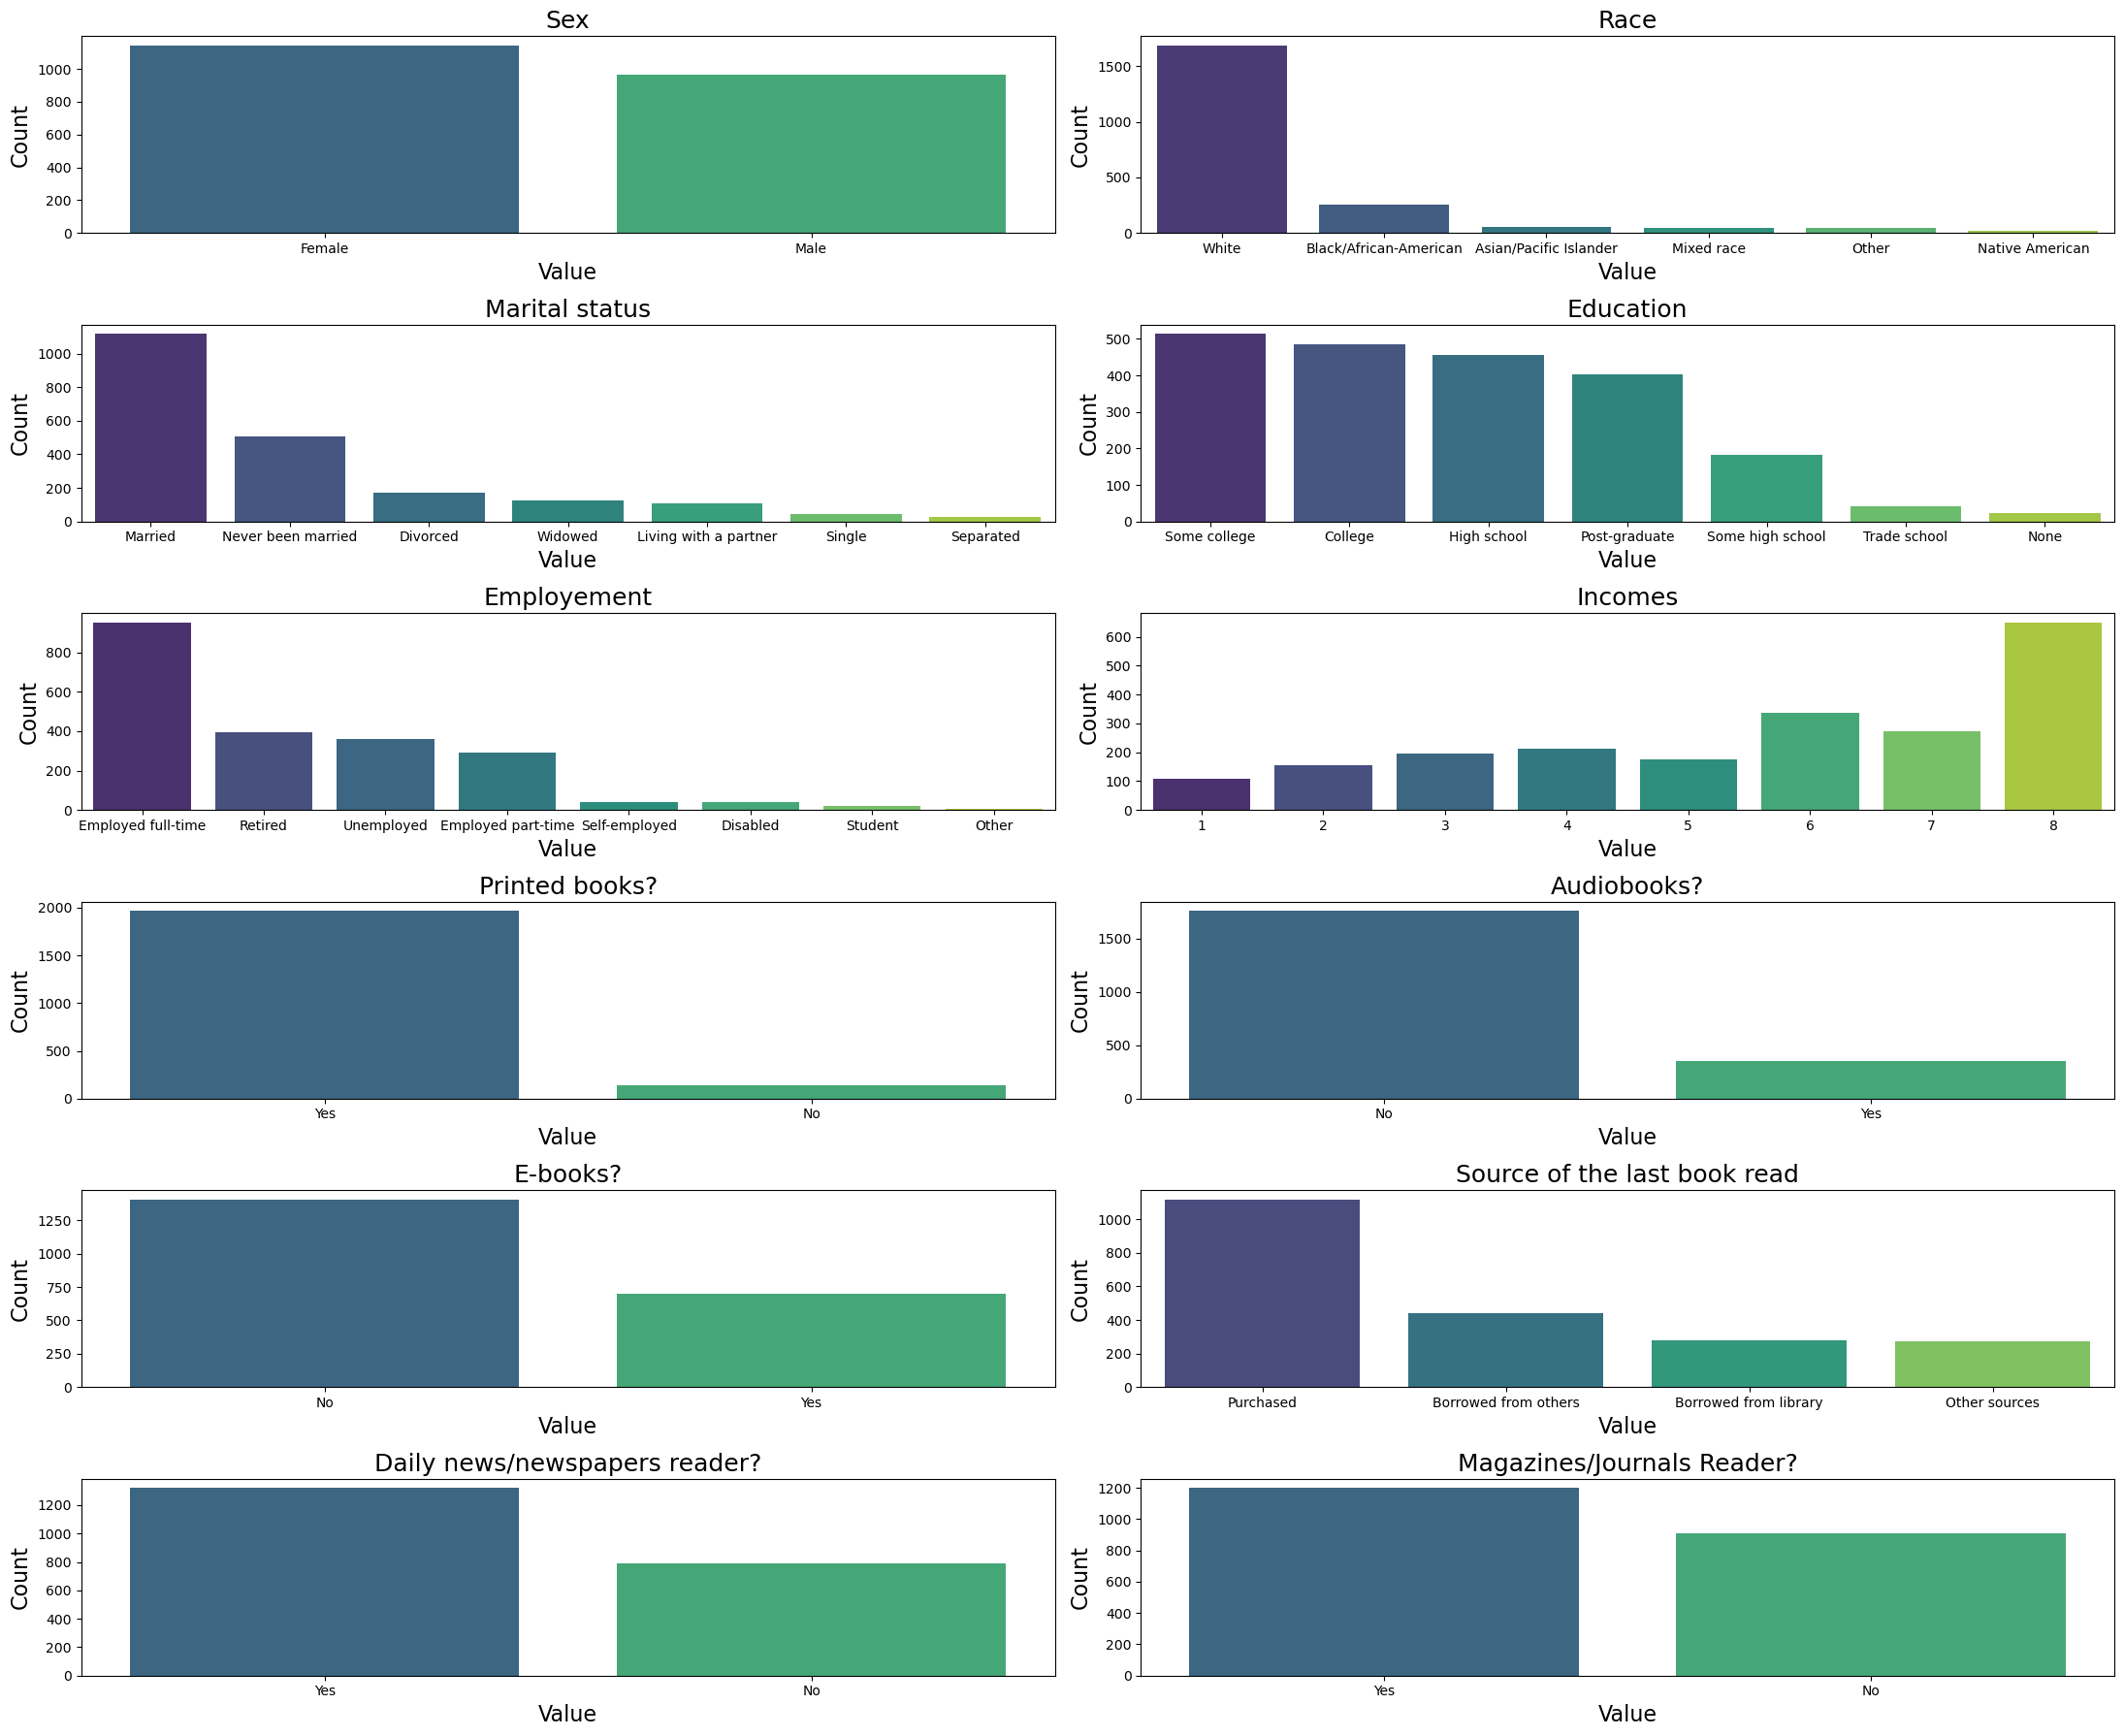

In [26]:
# from matplotlib.gridspec import GridSpec
def plot_from_dict(category_dict):
    fig, axes = plt.subplots(6, 2, figsize=(22, 18))
    axes = axes.flatten()  # biến mảng 2D của axes thành 1D để dễ truy cập
    
    for idx, (col, data) in enumerate(category_dict.items()):
        sns.barplot(
            x=data['values'],
            y=data['counts'],
            ax=axes[idx],
            palette='viridis'
        )
        axes[idx].set_title(f"{col}", fontsize=18)
        axes[idx].set_xlabel('Value', fontsize=16)
        axes[idx].set_ylabel('Count', fontsize=16)
        axes[idx].tick_params(axis='x')

    for idx in range(len(category_dict), 6 * 2):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_from_dict(category_dict)


Lưu dữ liệu đã được làm sạch vào file reading_behavior_clean.csv

In [27]:
df.to_csv('./data/cleaned_data.csv', index=False)